## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loding Dataset

In [2]:
from google.colab import files
uploaded=files.upload()

Saving hotel_booking_data.csv to hotel_booking_data.csv


In [3]:
df=pd.read_csv('hotel_booking_data.csv')

# Exploratory Data Analysis and Data Cleaning

In [4]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
0,Hayaat Resort,0,342,2017,July,27,1,0,0,2,...,C,3,No Deposit,NaN,0,Transient,0.0,0,Check-Out,01-07-2017
1,Hayaat Resort,0,737,2017,July,27,1,0,0,2,...,C,4,No Deposit,NaN,0,Transient,0.0,0,Check-Out,01-07-2017
2,Hayaat Resort,0,7,2017,July,27,1,0,1,1,...,C,0,No Deposit,NaN,0,Transient,75.0,0,Check-Out,02-07-2017
3,Hayaat Resort,0,13,2017,July,27,1,0,1,1,...,A,0,No Deposit,304.0,0,Transient,75.0,0,Check-Out,02-07-2017
4,Hayaat Resort,0,14,2017,July,27,1,0,2,2,...,A,0,No Deposit,240.0,0,Transient,98.0,1,Check-Out,03-07-2017


In [5]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
119385,Hayaat City,0,23,2019,August,35,30,2,5,2,...,A,0,No Deposit,394.0,0,Transient,96.14,0,Check-Out,06-09-2019
119386,Hayaat City,0,102,2019,August,35,31,2,5,3,...,E,0,No Deposit,9.0,0,Transient,225.43,2,Check-Out,07-09-2019
119387,Hayaat City,0,34,2019,August,35,31,2,5,2,...,D,0,No Deposit,9.0,0,Transient,157.71,4,Check-Out,07-09-2019
119388,Hayaat City,0,109,2019,August,35,31,2,5,2,...,A,0,No Deposit,89.0,0,Transient,104.40,0,Check-Out,07-09-2019
119389,Hayaat City,0,205,2019,August,35,29,2,7,2,...,A,0,No Deposit,9.0,0,Transient,151.20,2,Check-Out,07-09-2019


In [6]:
df.shape

(119390, 29)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  country         

In [9]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [10]:
df['Total_people']=df['adults']+df['babies']+df['children']
df['Total_stay'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [12]:
df.describe(include=object)

,hotel,arrival_date_month,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,177,8,5,10,12,3,4,3
top,Hayaat City,August,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,48590,56477,97870,85994,74053,104641,89613,75166


In [13]:
#printing columns
for col in df.describe(include=object).columns:
 print(col)
 print(df[col].unique())
 print('-'*50)

hotel
['Hayaat Resort ' 'Hayaat City']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL

In [14]:
df.isnull().sum() #to check null values

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0


In [15]:
# it will remove missing values from all the columns
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
reservation_status          

In [17]:
df.describe()
# gives summary stastistics

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests,Total_people,Total_stay
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,0.390314,111.740092,2018.156977,27.339155,15.786771,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,2.619579,104.679911,0.605458,2.018854,3.567837
std,0.487823,107.681013,0.706117,13.279990,8.794042,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,18.797440,50.021697,0.799342,0.654642,2.549886
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,2018.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,2.000000,2.000000
50%,0.000000,79.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,2.000000,3.000000
75%,1.000000,169.000000,2019.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,1.000000,2.000000,4.000000
max,1.000000,629.000000,2019.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,5.000000,26.000000,57.000000


<Axes: >

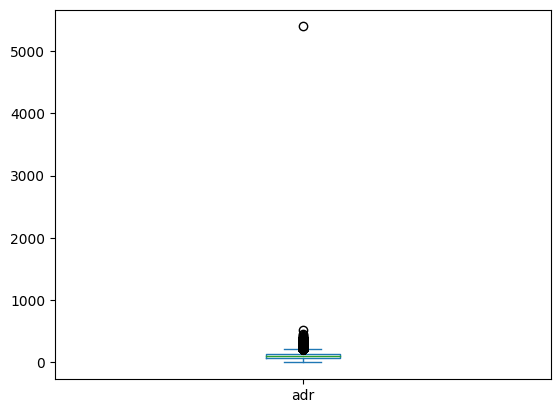

In [18]:

df['adr'].plot(kind='box')

In [19]:
df=df[df['adr']<5000]

# Data Analysis and Visualization

In [20]:
df['is_canceled'].value_counts() #total counts

0    62733
1    40160
Name: is_canceled, dtype: int64

In [21]:
df['is_canceled'].value_counts(normalize=True)

0    0.609692
1    0.390308
Name: is_canceled, dtype: float64

0    0.609692
1    0.390308
Name: is_canceled, dtype: float64


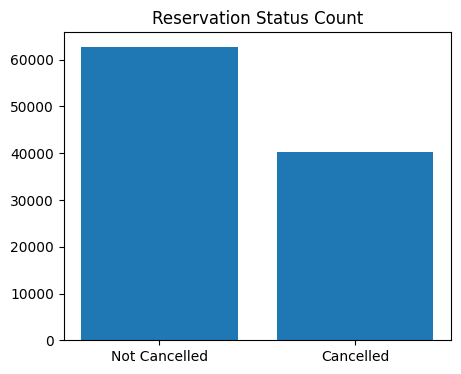

In [22]:
canceled_perc = df['is_canceled'].value_counts(normalize = True) #value count returns column name n hw many times value is present
print(canceled_perc)
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts())
plt.show()

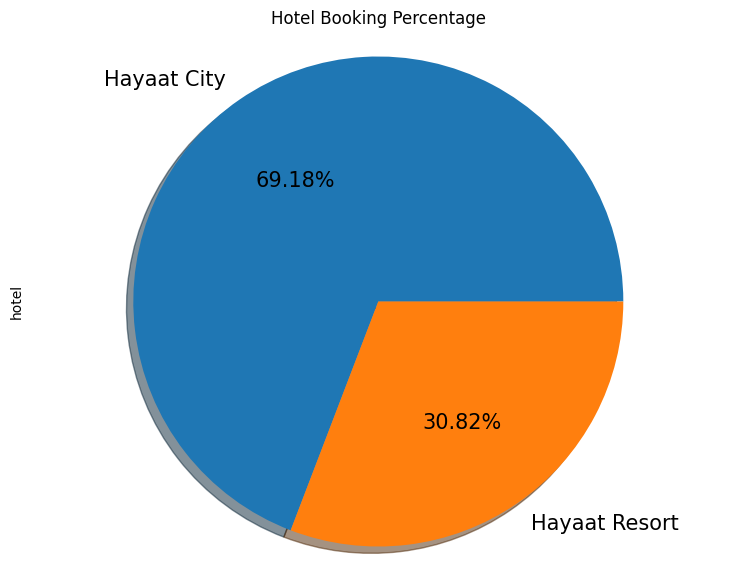

In [23]:
# prefered hotel booking by the customers
hotel_count = df.hotel.value_counts()
hotel_count.plot.pie(figsize=(9,7),autopct='%1.2f%%',shadow=True,fontsize=15)
plt.title('Hotel Booking Percentage')
plt.axis('equal')
plt.show()


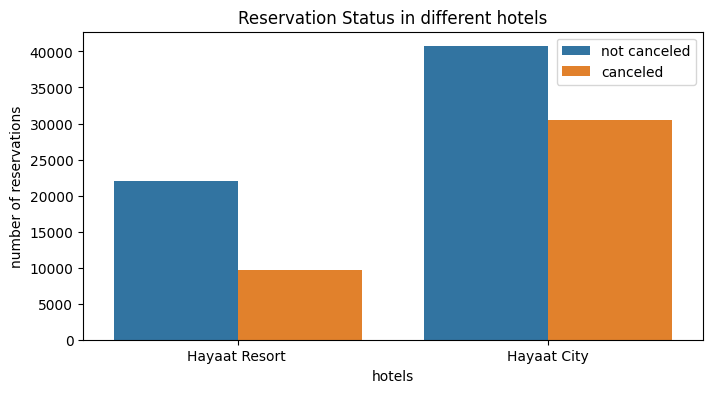

In [24]:

plt.figure(figsize=(8,4))
ax=sns.countplot(x='hotel',hue='is_canceled',data=df)
legend_labels,_ = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status in different hotels')
plt.xlabel('hotels')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

In [25]:
Hayaat_Resort=df[df['hotel']=='Hayaat Resort ']
Hayaat_Resort['is_canceled'].value_counts(normalize=True)
#individual hotel % cancellation

0    0.694636
1    0.305364
Name: is_canceled, dtype: float64

In [26]:
Hayaat_City=df[df['hotel']=='Hayaat City']
Hayaat_City['is_canceled'].value_counts(normalize=True)



0    0.571846
1    0.428154
Name: is_canceled, dtype: float64

In [27]:
Hayaat_City= Hayaat_City.groupby('reservation_status_date')[['adr']].mean()
Hayaat_Resort= Hayaat_Resort.groupby('reservation_status_date')[['adr']].mean()

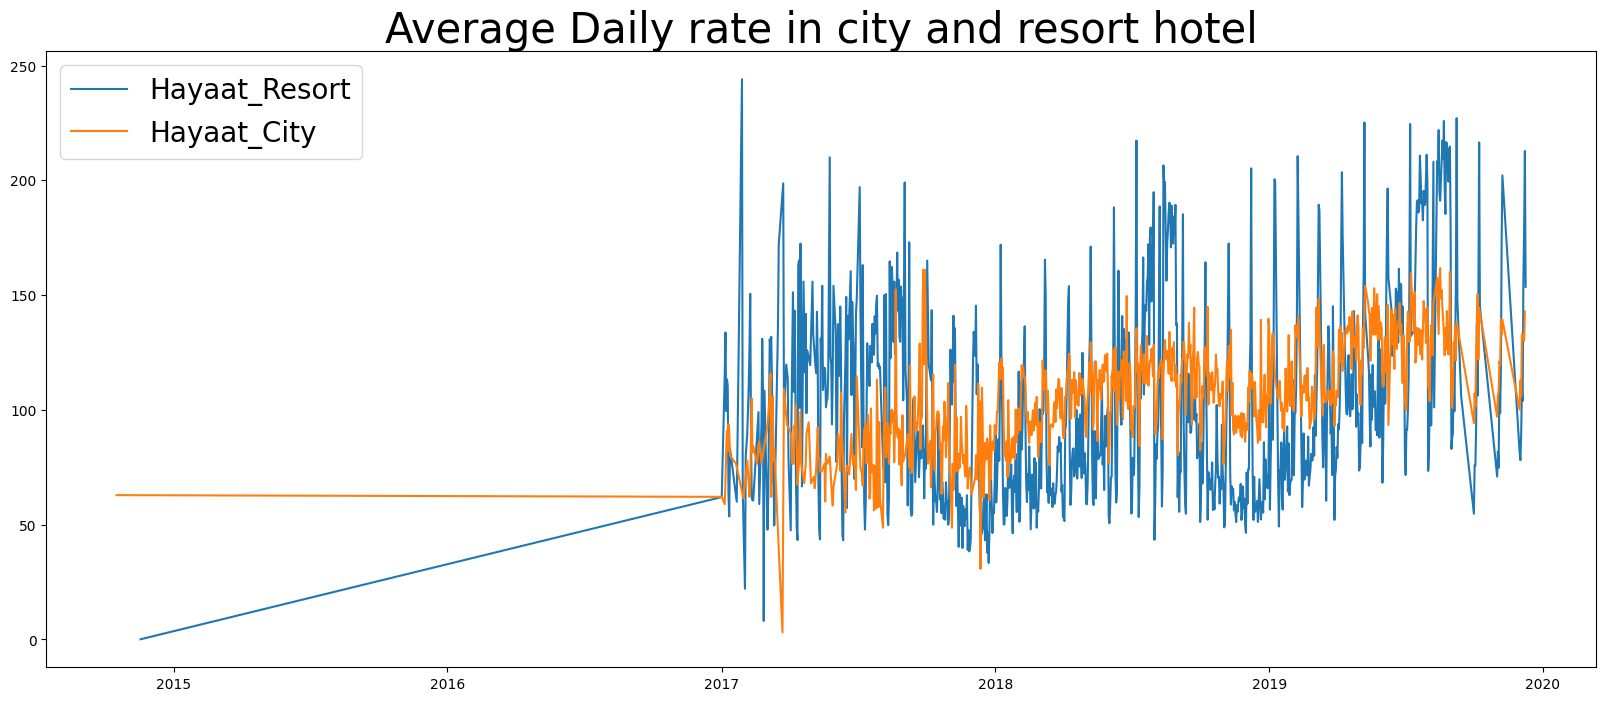

In [28]:
plt.figure(figsize=(20,8))
plt.title('Average Daily rate in city and resort hotel',fontsize =30)
plt.plot(Hayaat_Resort.index   ,Hayaat_Resort['adr'],label='Hayaat_Resort')
plt.plot(Hayaat_City.index  ,Hayaat_City['adr'],label='Hayaat_City')
plt.legend(fontsize=20)
plt.show()


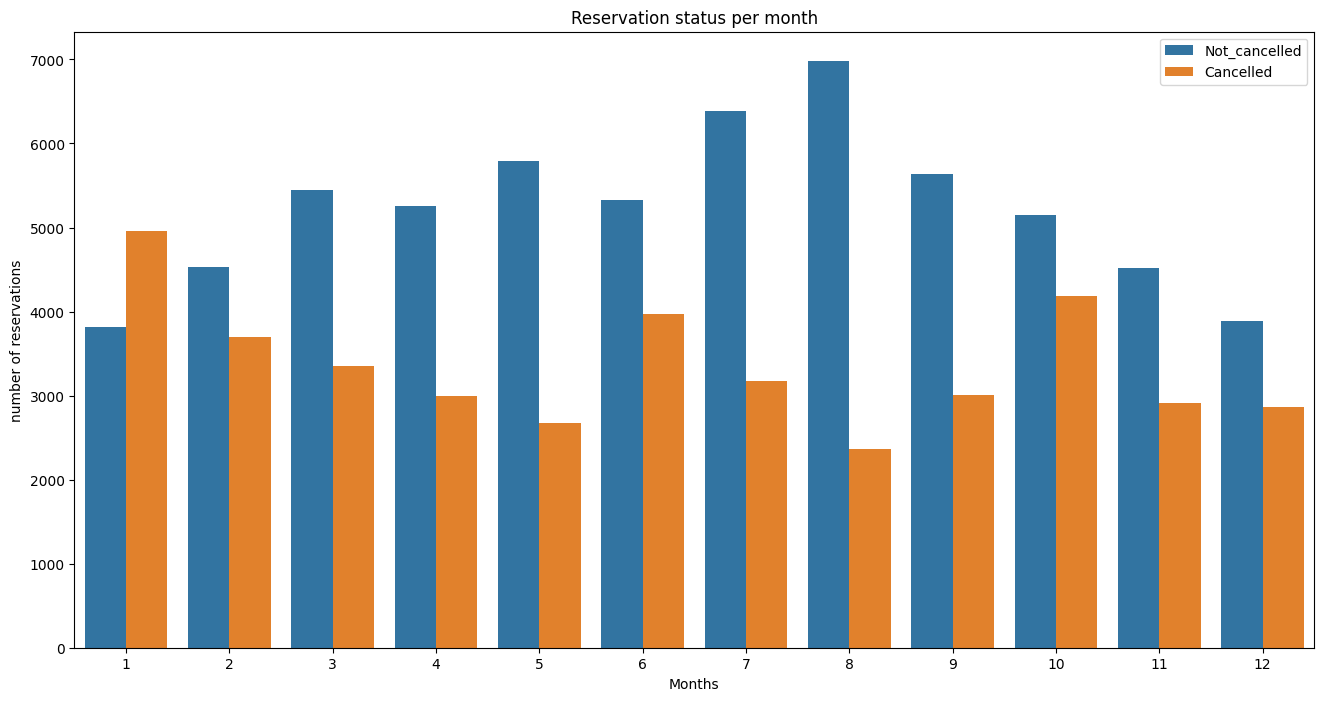

In [29]:

df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax=sns.countplot(x=df['month'],hue='is_canceled',data=df)
legend_labels,_ =ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month')
plt.xlabel('Months')
plt.ylabel('number of reservations')
plt.legend(['Not_cancelled','Cancelled'])
plt.show()

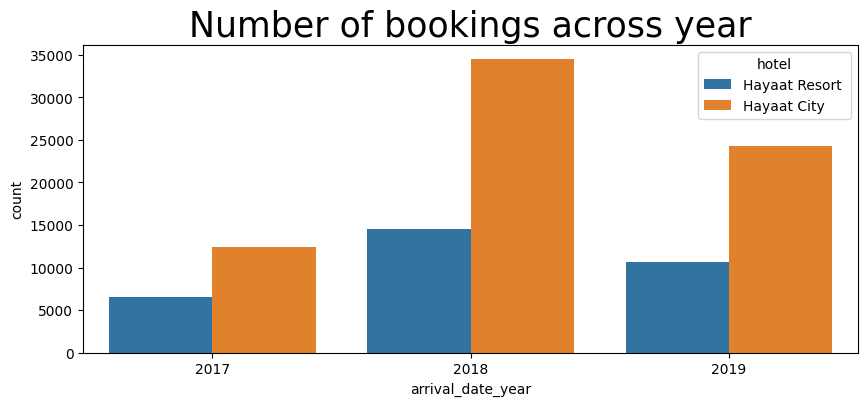

In [30]:
# which year has most bookings
plt.figure(figsize=(10,4))
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title('Number of bookings across year',fontsize=25)
plt.show()

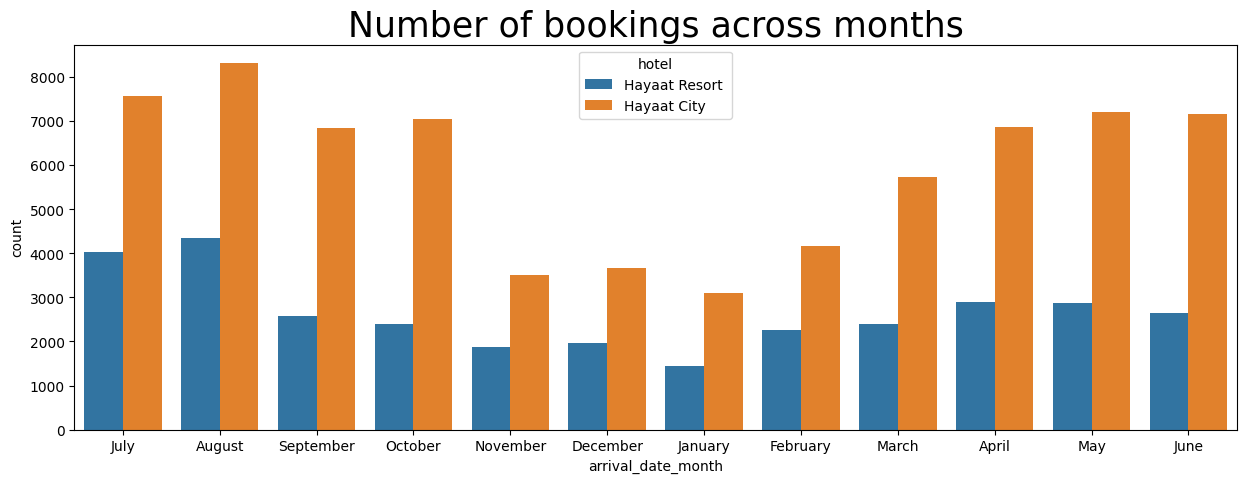

In [31]:
# which month has most bookings in each hotel type
plt.figure(figsize=(15,5))
sns.countplot(x = df['arrival_date_month'],hue=df['hotel'])
plt.title('Number of bookings across months',fontsize=25)
plt.show()

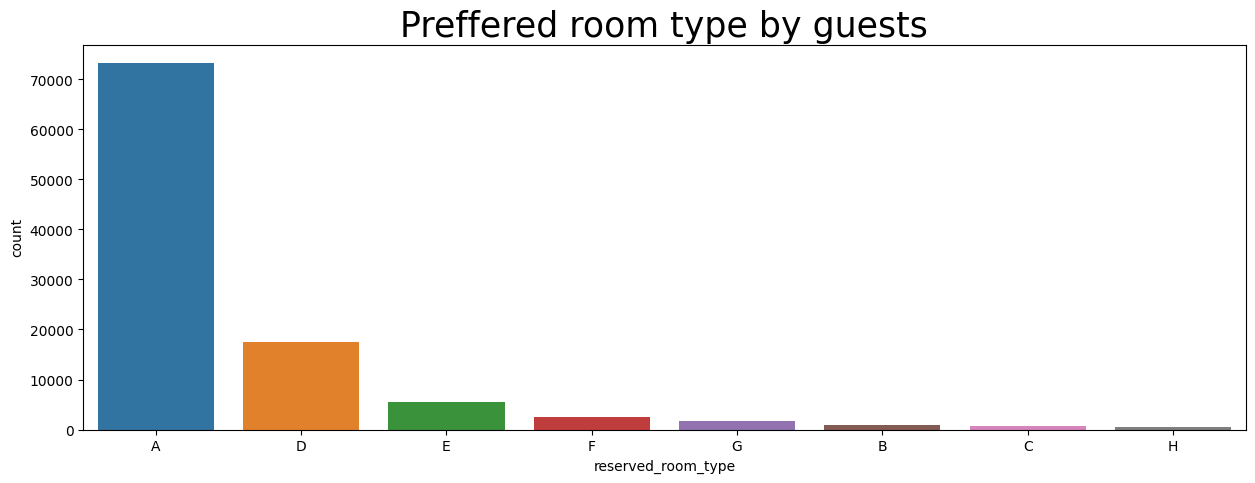

In [32]:
# which room type is most prefered by the guest
plt.figure(figsize=(15,5))
sns.countplot(x=df['reserved_room_type'],order=df['reserved_room_type'].value_counts().index)
plt.title('Preffered room type by guests' , fontsize=25)
plt.show()

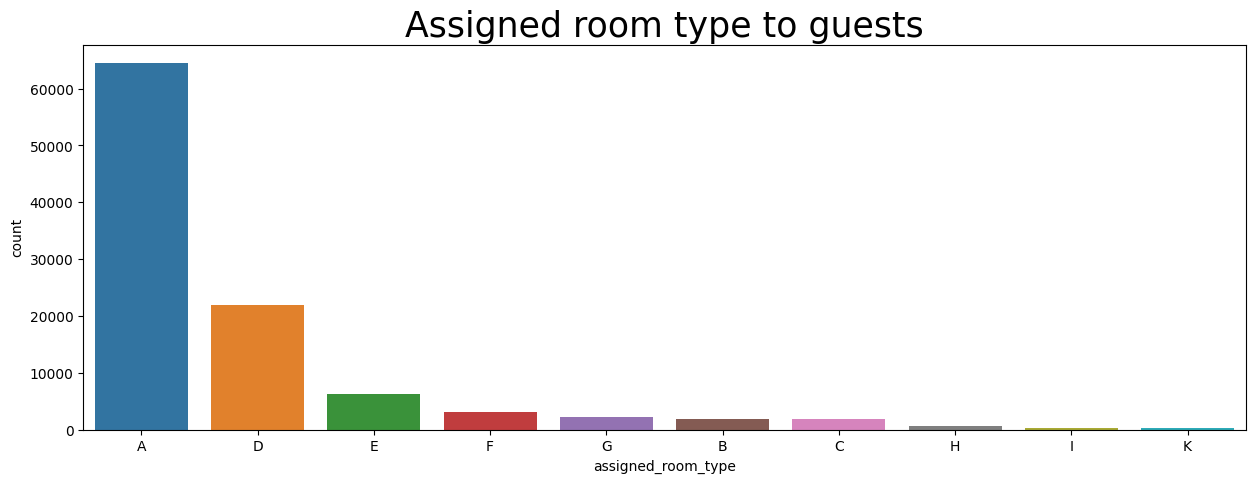

In [33]:
# which room type is most assigned
plt.figure(figsize=(15,5))
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
plt.title('Assigned room type to guests' , fontsize=25)
plt.show()

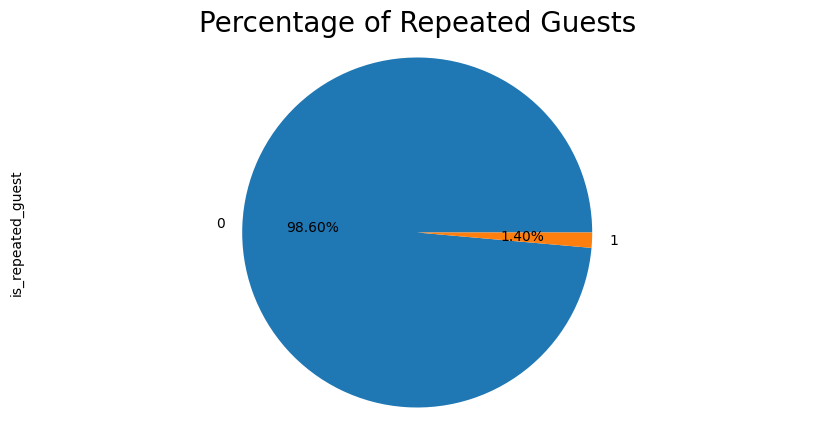

In [34]:
# what is percentage of repeated guests ?
rep_guests = df['is_repeated_guest'].value_counts()
rep_guests.plot.pie(autopct='%1.2f%%', figsize=(10,5))
plt.title('Percentage of Repeated Guests',fontsize=20)
plt.axis('equal')
plt.show()

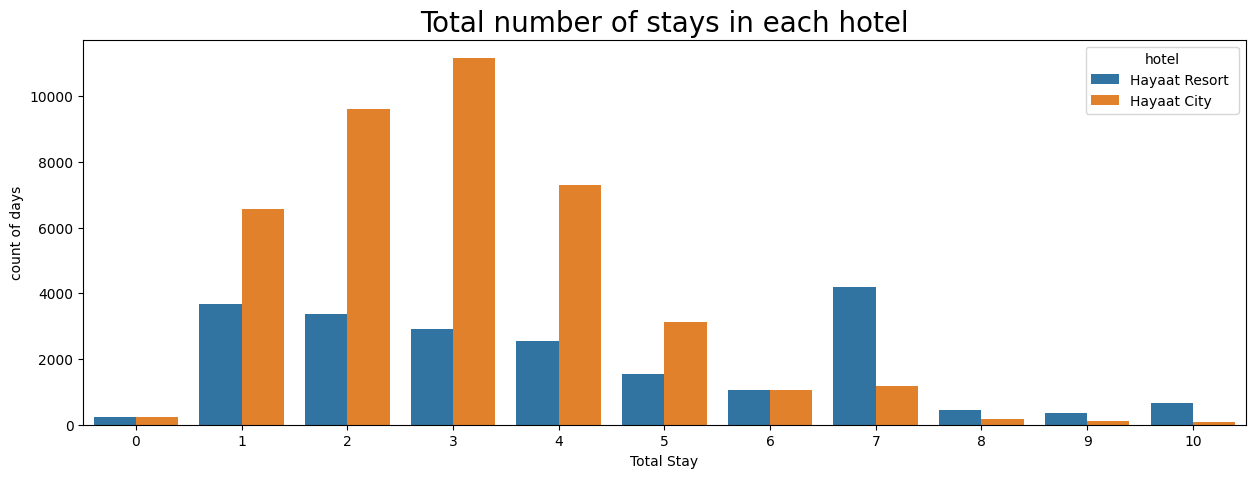

In [36]:
not_cancelled_data = df[df['is_canceled'] == 0 ]
hotel_stay=not_cancelled_data[not_cancelled_data['Total_stay']<=10]

plt.figure(figsize=(15,5))
sns.countplot(x=hotel_stay['Total_stay'],hue=hotel_stay['hotel'])
plt.title('Total number of stays in each hotel',fontsize=20)
plt.xlabel('Total Stay')
plt.ylabel('count of days')
plt.show()

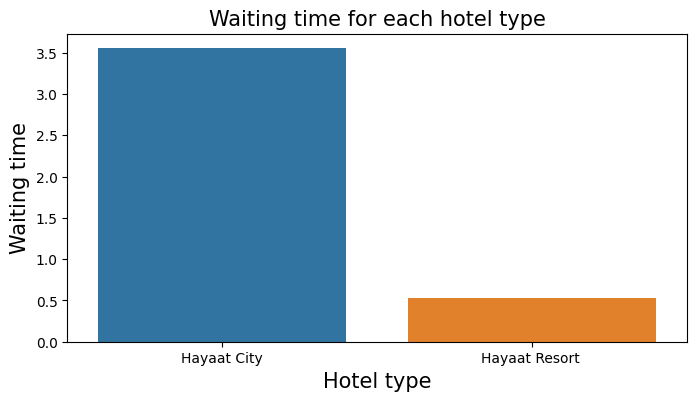

In [37]:
# which hotel has the longer waiting time ?
waiting_time=df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x=waiting_time['hotel'],y=waiting_time['days_in_waiting_list'])
plt.xlabel('Hotel type',fontsize=15)
plt.ylabel('Waiting time',fontsize=15)
plt.title('Waiting time for each hotel type',fontsize=15)
plt.show()



In [38]:
data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()


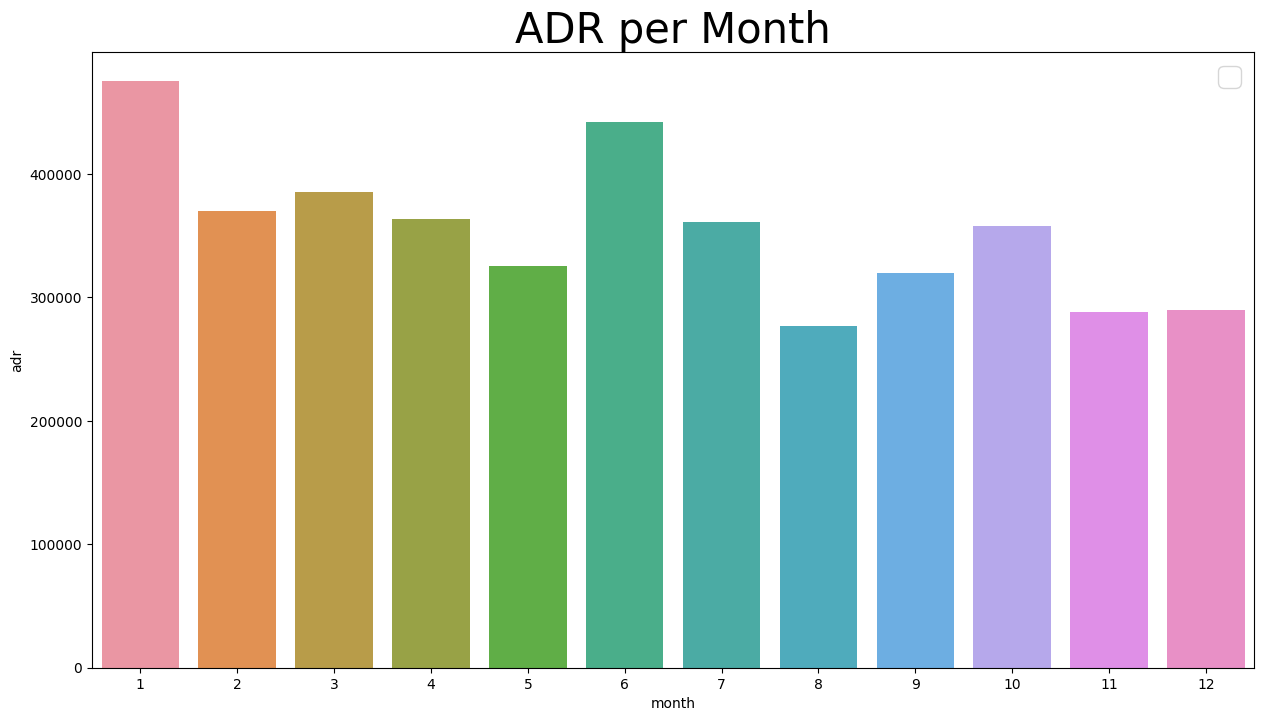

In [39]:
plt.figure(figsize = (15,8))
plt.title('ADR per Month',fontsize = 30)
sns.barplot(x='month' ,y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.legend(fontsize=20)
plt.show()

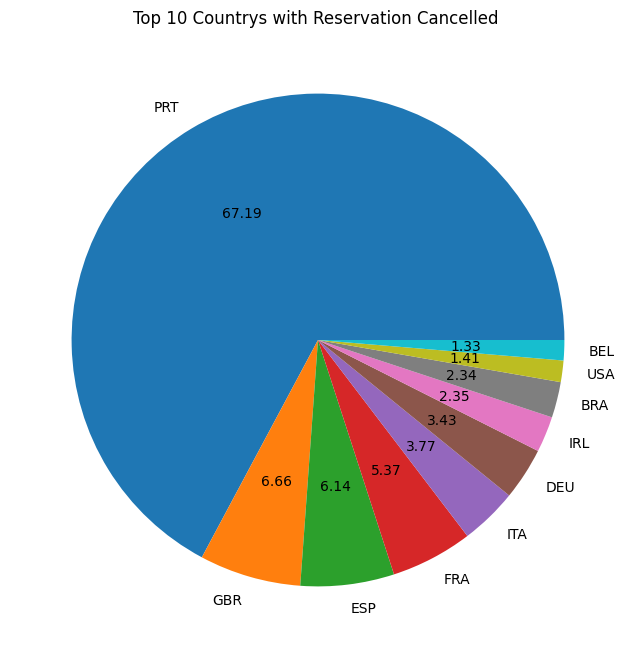

In [40]:
cancelled_data=df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 Countrys with Reservation Cancelled ')
plt.pie(top_10_country, autopct='%.2f',labels=top_10_country.index)
plt.show()

In [41]:
df['market_segment'].value_counts()

Online TA        56057
Offline TA/TO    23773
Groups           15661
Direct            6582
Corporate          692
Complementary      103
Aviation            25
Name: market_segment, dtype: int64

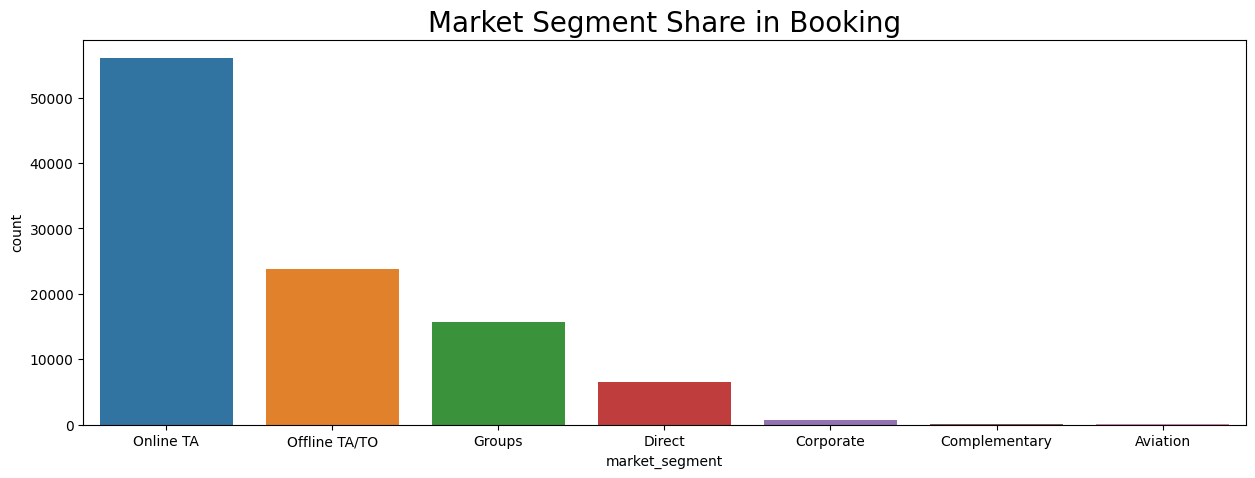

In [42]:
# which market segment has most booking
plt.figure(figsize=(15,5))
sns.countplot(x=df['market_segment'],order=df['market_segment'].value_counts().index)
plt.title('Market Segment Share in Booking',fontsize=20)
plt.show()

In [43]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.544809
Offline TA/TO    0.231046
Groups           0.152207
Direct           0.063969
Corporate        0.006725
Complementary    0.001001
Aviation         0.000243
Name: market_segment, dtype: float64

In [44]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.515264
Groups           0.250473
Offline TA/TO    0.200199
Direct           0.029358
Corporate        0.004258
Complementary    0.000299
Aviation         0.000149
Name: market_segment, dtype: float64

In [45]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled'] == 0 ]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)



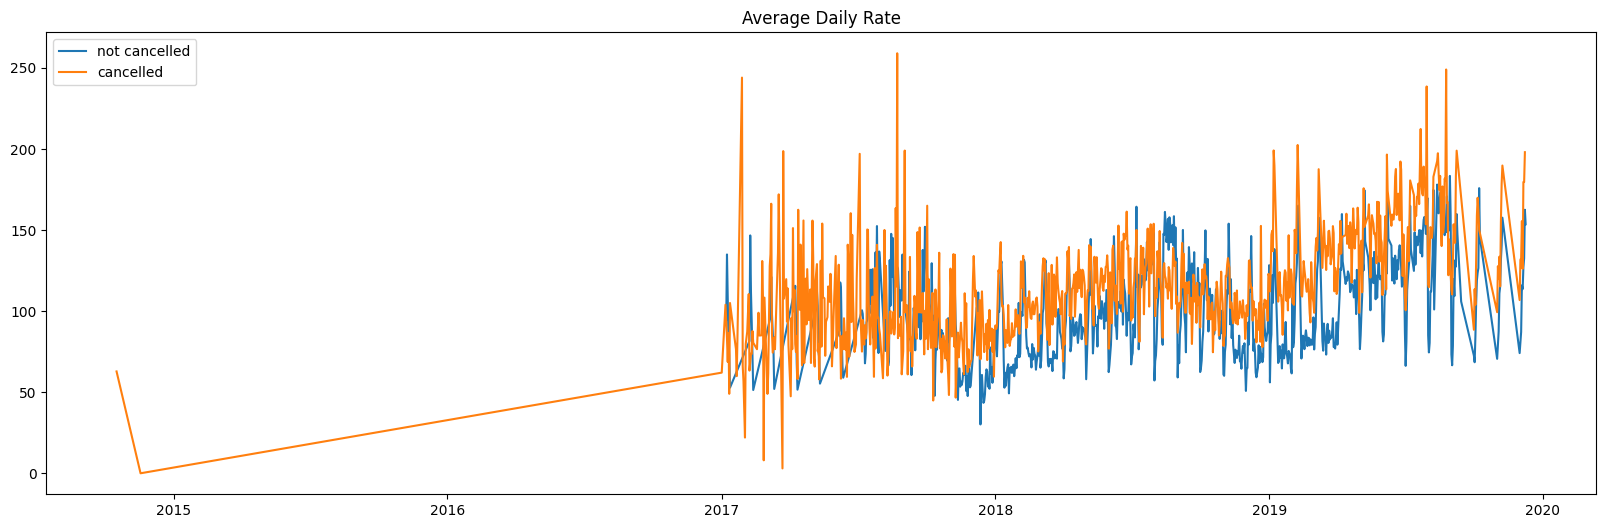

In [46]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label = 'cancelled')
plt.legend()

In [47]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2020')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']> '2016') &(not_cancelled_df_adr['reservation_status_date']<'2020')]

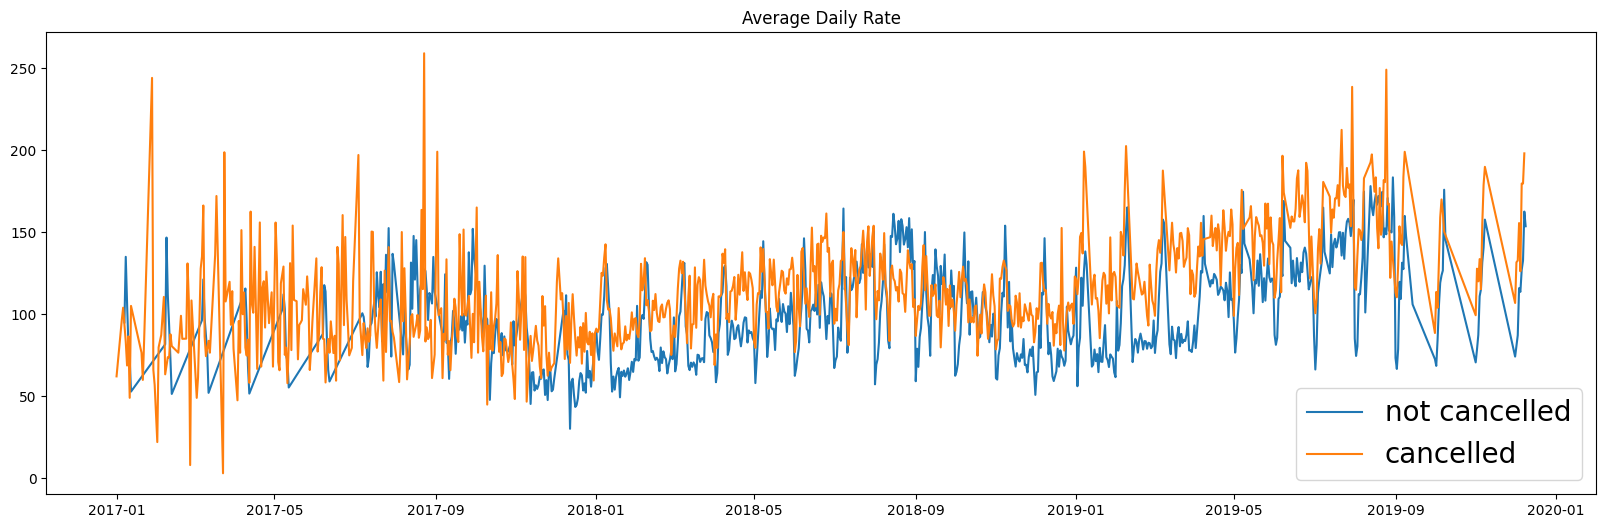

In [48]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label = 'cancelled')
plt.legend(fontsize=20)
plt.show()